In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./Dataset\AccVal_acc.png
./Dataset\LossVal_loss.png
./Dataset\malaria-detection-project.ipynb
./Dataset\malaria_model.h5
./Dataset\Untitled.ipynb
./Dataset\.ipynb_checkpoints\malaria-detection-project-checkpoint.ipynb
./Dataset\.ipynb_checkpoints\Untitled-checkpoint.ipynb
./Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_10.png
./Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_11.png
./Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_12.png
./Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_13.png
./Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_14.png
./Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_15.png
./Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_16.png
./Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_17.png
./Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_18.png
./Dataset\Test\Parasite\C39P4thinF_original

./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_111.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_112.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_113.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_114.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_115.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_116.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_117.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_118.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_119.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_120.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_121.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_122.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_123.png
./Dataset\Train\Parasite\C133P94ThinF_IMG_20151004_155721_cell_124.png
./Data

In [2]:
import keras
from keras.applications.vgg19 import VGG19

In [3]:
image_size = [224,224]
WIDTH = 151
HEIGHT = 136
BATCH_SIZE = 32
train_path = './Dataset/Train'
test_path = './Dataset/Test'

In [4]:
vgg19 = VGG19(input_shape=image_size+[3],weights="imagenet",include_top=False)

for layers in vgg19.layers:
    layers.trainable=False

In [5]:
from keras.layers import Dense, Flatten
from keras.models import Sequential, Model
x = Flatten()(vgg19.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
import tensorflow as tf
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory=train_path,
            shuffle=True,
            image_size=(WIDTH,HEIGHT),
            batch_size = BATCH_SIZE,
)

Found 416 files belonging to 2 classes.


In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./Dataset/Train',
                                                target_size = (224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 416 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory('./Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [10]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\arunt\AppData\Local\Temp\ipykernel_16048\177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
13/13 [==============================] - 125s 10s/step - loss: 1.5008 - accuracy: 0.5144 - val_loss: 0.9459 - val_accuracy: 0.6791
Epoch 2/10
13/13 [==============================] - 140s 11s/step - loss: 0.8119 - accuracy: 0.6178 - val_loss: 0.8899 - val_accuracy: 0.5299
Epoch 3/10
13/13 [==============================] - 135s 11s/step - loss: 0.6209 - accuracy: 0.7115 - val_loss: 0.5918 - val_accuracy: 0.7239
Epoch 4/10
13/13 [==============================] - 137s 11s/step - loss: 0.3582 - accuracy: 0.8510 - val_loss: 0.4222 - val_accuracy: 0.7687
Epoch 5/10
13/13 [==============================] - 142s 11s/step - loss: 0.3253 - accuracy: 0.8750 - val_loss: 0.4018 - val_accuracy: 0.7612
Epoch 6/10
13/13 [==============================] - 142s 11s/step - loss: 0.3457 - accuracy: 0.8510 - val_loss: 0.5279 - val_accuracy: 0.7612
Epoch 7/10
13/13 [==============================] - 136s 11s/step - loss: 0.2980 - accuracy: 0.8966 - val_loss: 0.3579 - val_accuracy: 0.8433
Epoch 

In [16]:
# Save the model
model.save("vgg19_model_trained.h5")

C:\Users\arunt\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
import keras
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the saved model
loaded_model = load_model("vgg19_model_trained.h5")

# Load an image from a local directory for prediction
image_path = './Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_10.png'  # Replace with the actual image path
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255

# Make predictions
predictions = loaded_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Define a dictionary to map class index to class labels (if available)
class_labels = {0: 'parasite', 1: 'uninfected'}  # Replace with your actual class labels

# Get the class label of the predicted class
predicted_label = class_labels[predicted_class]

print("Predicted Class:", predicted_class)
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 495ms/step
Predicted Class: 0
Predicted Label: parasite


In [12]:
# Save the trained model as a Pickle file
import pickle
with open('malaria_detection.pkl', 'wb') as model_file:
    pickle.dump(r, model_file)

print("Model saved as malaria_detection.pkl")

Model saved as malaria_detection.pkl


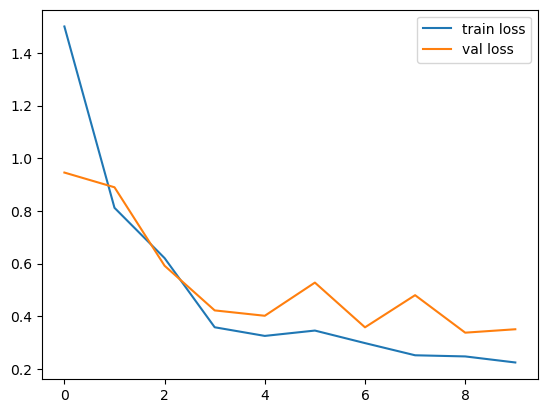

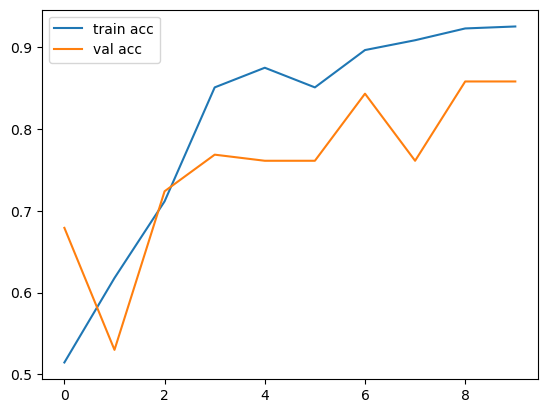

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Plotting Some Images:

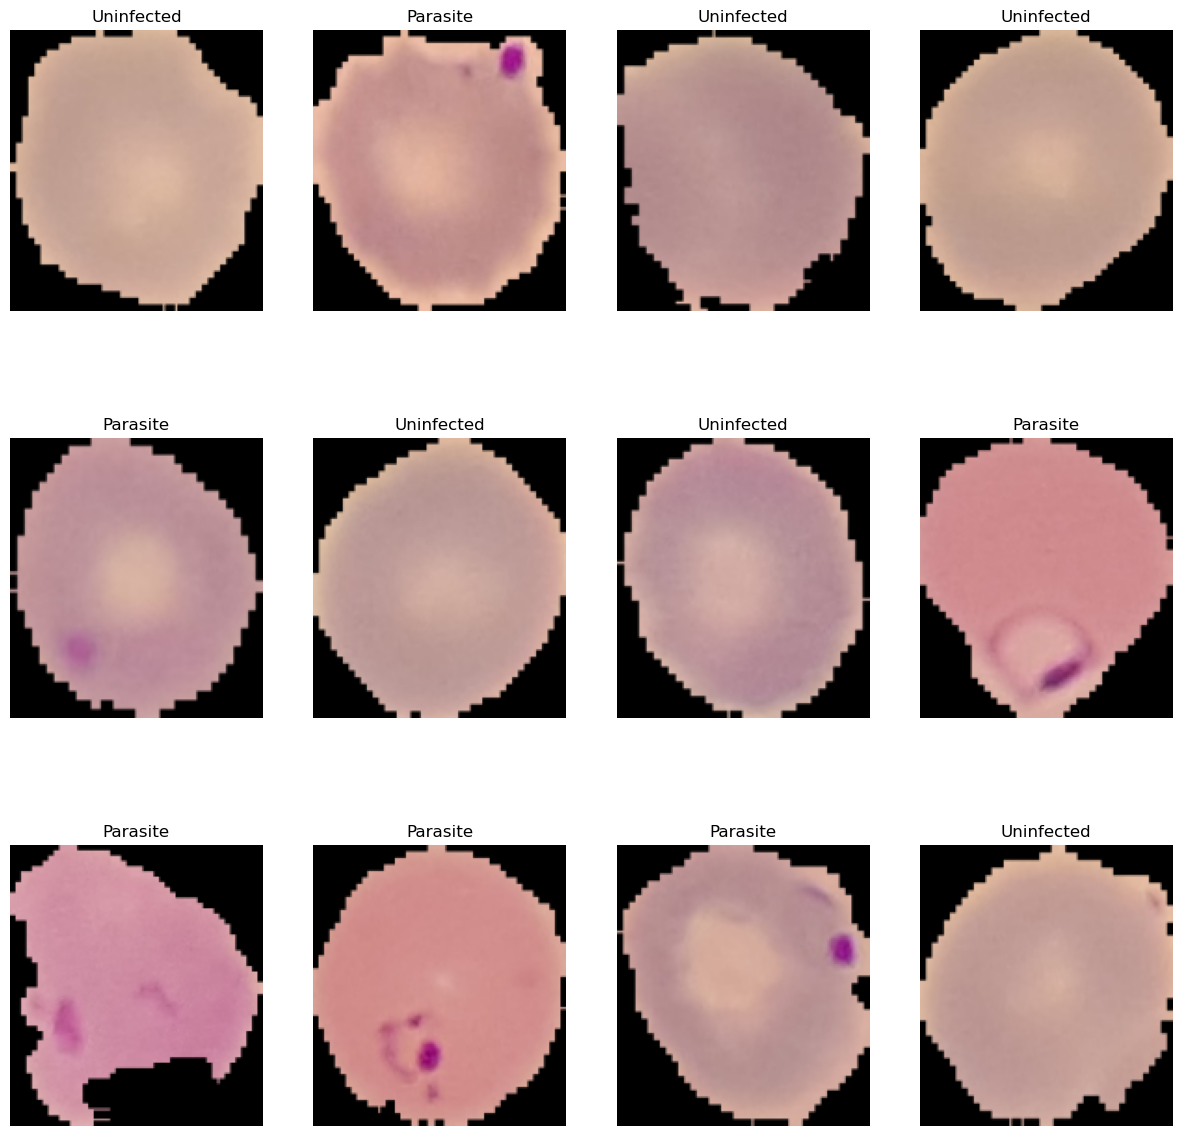

In [14]:
classnames = train_dataset.class_names
classnames
plt.figure(figsize = (15,15))
for image, label in train_dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classnames[label[i]])
        plt.axis('off')
    